In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df1 = pd.read_csv('Banglore_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df1.shape

(13320, 9)

In [8]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [10]:
df2 = df1.drop(['area_type','availability','society','balcony'], axis = 1)

In [11]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [13]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
df3.shape

(13246, 5)

In [16]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [17]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df3['BHK'] = df3['size'].apply(lambda x:x.split(' ')[0])

<ipython-input-18-c225740670c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x:x.split(' ')[0])


In [19]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [20]:
df3['BHK'] = df3['BHK'].astype('int64')

<ipython-input-20-a46a6556e274>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['BHK'].astype('int64')


In [21]:
df3.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
BHK             int64
dtype: object

In [22]:
df3.drop('size', axis =1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
df3.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [24]:
def is_float(x):
    # if try don't work it won't give error if try statement don't work
    try:
        float(x)
    except:
        return False
    return True

In [25]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [26]:
df3[~df3['total_sqft'].apply(is_float)]['total_sqft'].unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
       '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882',
       '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards',
       '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315',
       '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '167Sq. Meter', '1076 - 1199',

In [27]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [28]:
print(convert_sqft_to_num('234 perch'))

None


In [29]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(5)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [30]:
df4[~df4['total_sqft'].apply(is_float)]['total_sqft'].unique()

array([], dtype=float64)

In [31]:
df4.loc[30]

location      Yelahanka
total_sqft         2475
bath                  4
price               186
BHK                   4
Name: 30, dtype: object

In [32]:
df4.iloc[30]

location      Yelahanka
total_sqft         2475
bath                  4
price               186
BHK                   4
Name: 30, dtype: object

In [33]:
df4.dtypes

location       object
total_sqft    float64
bath          float64
price         float64
BHK             int64
dtype: object

In [34]:
df4.loc[410]

location      Kengeri
total_sqft        NaN
bath                1
price            18.5
BHK                 1
Name: 410, dtype: object

In [35]:
df4.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [36]:
df5 = df4.dropna()

In [37]:
df5.shape

(13200, 5)

In [38]:
df5.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [39]:
df6= df5.copy()
df6['price per sqft'] = df6['price']*100000/df6['total_sqft']
#df6.drop('total_sqft', axis =1, inplace = True)
df6.head(2)

,location,total_sqft,bath,price,BHK,price per sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615


In [40]:
df6['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [41]:
df6['location'].nunique()

1298

# if we will do one hot encoding on this it will led to 1297 columns , which is a curse of dimensionality

In [42]:
df6.location = df6.location.apply(lambda x: x.strip())
location_stats = df6.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield              533
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          264
Thanisandra             235
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [43]:
len(location_stats[location_stats<=10])

1047

In [44]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Dodsworth Layout        10
BTM 1st Stage           10
Sadashiva Nagar         10
Thyagaraja Nagar        10
Kalkere                 10
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1047, dtype: int64

In [45]:
df6['location'] = df6['location'].apply(lambda x:'other'if x in location_stats_less_than_10 else x)
df6['location'].nunique()

241

In [46]:
df6.head(10)

,location,total_sqft,bath,price,BHK,price per sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [47]:
df6.head(10)

,location,total_sqft,bath,price,BHK,price per sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


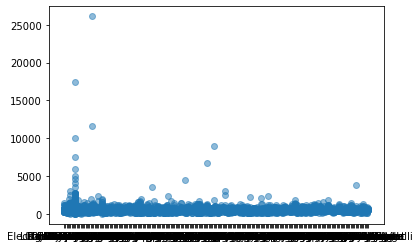

In [48]:
plt.scatter(df6['location'], df6['total_sqft']/df6['BHK'], alpha = 0.5)
plt.show()

In [49]:
df6[df6['total_sqft']/df6['BHK']<300].head(10)

,location,total_sqft,bath,price,BHK,price per sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,950.0,7.0,115.0,7,12105.263158
149,other,1034.0,5.0,185.0,6,17891.682785


In [50]:
df6.shape

(13200, 6)

In [51]:
df6.head(20)

,location,total_sqft,bath,price,BHK,price per sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [52]:
# remove if sqft per bhk is less than 300
df7 = df6[~(df6['total_sqft']/df6['BHK']<300)]

In [53]:
df7.head(30)

,location,total_sqft,bath,price,BHK,price per sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,70.00,3,3888.888889


In [54]:
df7.describe()

,total_sqft,bath,price,BHK,price per sqft
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,1590.189927,2.562781,111.187960,2.649004,6308.502826
std,1260.404795,1.080275,152.203367,0.976046,4168.127339
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [55]:
# remove price per sqft outlier outside 2 s.d range
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price per sqft'])
        st = np.std(subdf['price per sqft'])
        reduced_df = subdf[(subdf['price per sqft']>m-2*st) & (subdf['price per sqft']<=m+2*st)]
        df_out = pd.concat([df_out,reduced_df], ignore_index = True)
    return df_out
df8 = remove_pps_outliers(df7)
df8.shape

(11935, 6)

visualizing the cases where less BHK Flat has more price compare to more BHK FLAT

In [56]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df['location']== location)&(df['BHK'] ==2)]
    bhk3 = df[(df['location'] == location) & (df['BHK'] ==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2['total_sqft'],bhk2['price'], color ='b', label ='2 BHK',s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'], color ='g',marker ='x', label ='3 BHK',s=50)
    plt.xlabel('Total sqft area')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()

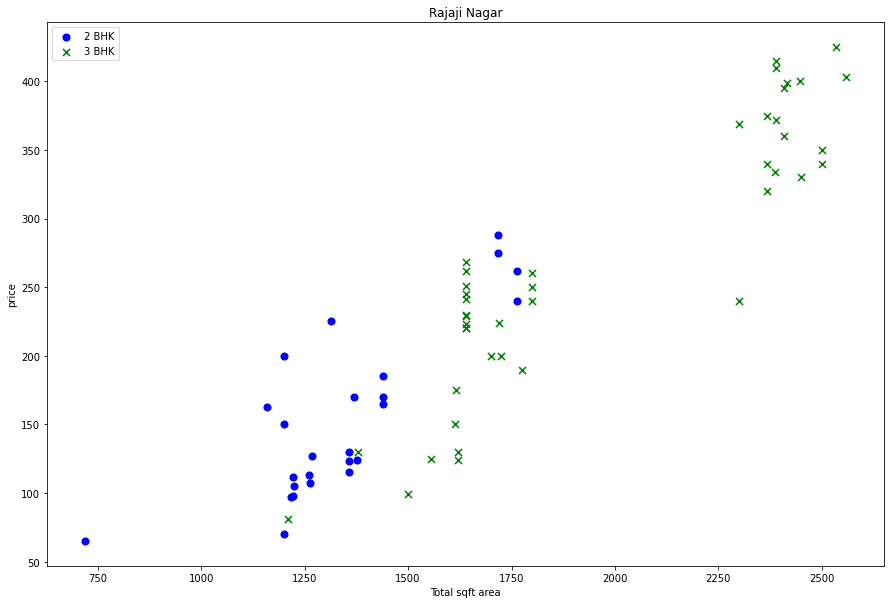

In [57]:
plot_scatter_chart(df8,'Rajaji Nagar')

remove data of those apartment where high BHK flat has less price compare to low BHK flat ,so we can remove this data , since here we don't know weather that apartment is on front side of road or back side.

In [58]:
df8.head()

,location,total_sqft,bath,price,BHK,price per sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,2400.0,4.0,450.0,4,18750.000000
4,1st Block Jayanagar,1000.0,3.0,60.0,2,6000.000000


In [59]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for BHK, bhk_df in location_df.groupby('BHK'):
            bhk_stats[BHK] = {
                'mean': np.mean(bhk_df['price per sqft']),
                'std': np.std(bhk_df['price per sqft']),
                'count': bhk_df.shape[0]
            }
        for BHK, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price per sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df9 = remove_bhk_outliers(df8)
# df8 = df7.copy()
df9.shape

(8384, 6)

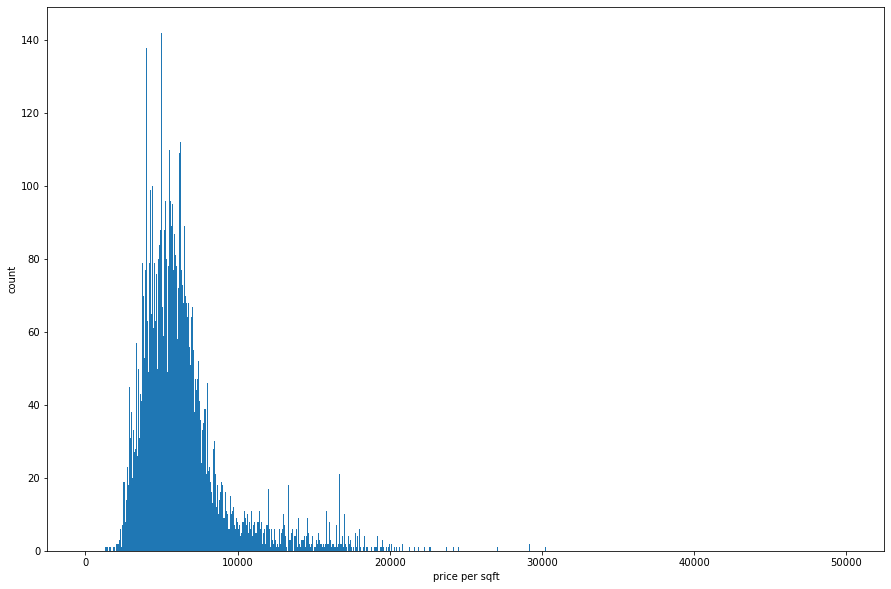

In [60]:
matplotlib.rcParams['figure.figsize']=(15,10)
plt.hist(df9['price per sqft'], bins =1000, range =(0,50000)  )
plt.xlabel('price per sqft')
plt.ylabel('count')
plt.show()

In [61]:
df9.dtypes

location           object
total_sqft        float64
bath              float64
price             float64
BHK                 int64
price per sqft    float64
dtype: object

In [62]:
df9['bath'].unique()

array([ 4.,  3.,  2.,  5.,  7.,  1.,  8.,  6.,  9., 10., 12., 14., 16.,
       13.])

In [63]:
df9[df9['bath']>10]

,location,total_sqft,bath,price,BHK,price per sqft
6292,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
9672,other,3300.0,14.0,500.0,9,15151.515152
10138,other,10000.0,16.0,550.0,16,5500.000000
10933,other,6000.0,12.0,150.0,11,2500.000000
11291,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

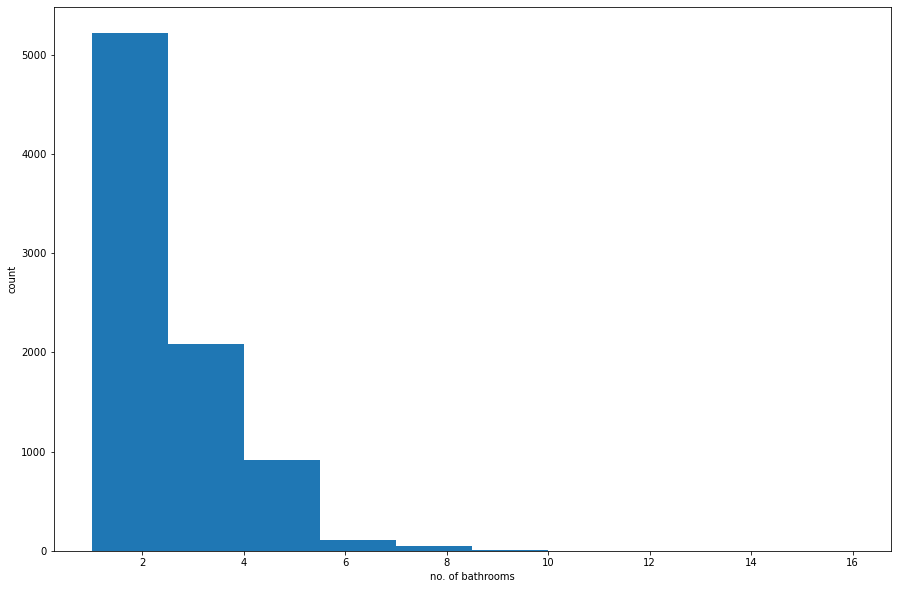

In [64]:
plt.hist(df9['bath'])
plt.xlabel('no. of bathrooms')
plt.ylabel('count')

In [65]:
df9[df9['bath']>df9['BHK']+3]

,location,total_sqft,bath,price,BHK,price per sqft
6239,Nagasandra,7000.0,8.0,450.0,4,6428.571429
9672,other,3300.0,14.0,500.0,9,15151.515152


In [66]:
df9.shape

(8384, 6)

In [67]:
df10 = df9[~(df9['bath']>(df9['BHK']+2))]
df10.shape

(8380, 6)

In [68]:
df11 = df10.drop('price per sqft', axis =1)

In [69]:
df11.head(2)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3


In [70]:
df11['location'].nunique()


241

NOW WE WILL BUILD THE MODEL

convert categorical variable to numeric to avoid dummy variable trap , we have one less dummy variable

In [71]:
dummies= pd.get_dummies(df11['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
#one column is droped to avoid dummy trap
df12 = pd.concat([df11,dummies.drop('other', axis =1)],axis =1)
df12.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2400.0,4.0,450.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1000.0,3.0,60.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df13 = df12.drop('location', axis =1)
df13.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2400.0,4.0,450.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000.0,3.0,60.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df13.shape

(8380, 244)

MODEL BUILDING



In [75]:
X= df13.drop('price', axis=1)
X.head(18)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2400.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000.0,3.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2750.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1760.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2450.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
Y=df13['price']
Y.head(2)

0    428.0
1    194.0
Name: price, dtype: float64

In [77]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2 , random_state =10)

In [78]:
X_train.shape

(6704, 243)

In [79]:
X_test.shape

(1676, 243)

In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=False)
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.7730130009341855

In [81]:
df13.dtypes

total_sqft             float64
bath                   float64
price                  float64
BHK                      int64
1st Block Jayanagar      uint8
                        ...   
Yelachenahalli           uint8
Yelahanka                uint8
Yelahanka New Town       uint8
Yelenahalli              uint8
Yeshwanthpur             uint8
Length: 244, dtype: object

In [82]:
lr.score(X_train,Y_train)

0.794392822371873

In [83]:
lr.score(X_test,Y_test)

0.7730130009341855

In [84]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv= ShuffleSplit(n_splits =5, test_size=0.2)
cross_val_score(LinearRegression(),X,Y,cv= cv)

array([0.77598945, 0.7446309 , 0.80604766, 0.77723053, 0.79794883])

In [85]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 6, shuffle = True)
cross_val_score(LinearRegression(),X,Y,cv= kf)

array([0.80134659, 0.75594911, 0.81950847, 0.76312602, 0.72709561,
       0.77451433])

In [86]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    print(scores)

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

[{'model': 'linear_regression', 'best_score': 0.7829887864157643, 'best_params': {'normalize': False}}, {'model': 'lasso', 'best_score': 0.6937197787676135, 'best_params': {'alpha': 1, 'selection': 'random'}}, {'model': 'decision_tree', 'best_score': 0.6238039589000554, 'best_params': {'criterion': 'mse', 'splitter': 'best'}}]


,model,best_score,best_params
0,linear_regression,0.782989,{'normalize': False}
1,lasso,0.693720,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.623804,"{'criterion': 'mse', 'splitter': 'best'}"


In [87]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [88]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

76.86668590699612

In [90]:
predict_price('Lingadheeranahalli',1000, 2, 2)

44.63346610036086